In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
settings = {"units": "Imperial", "appid": api_key}

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
   
    city_n = city.city_name + "," + city.country_code
    # If the city is unique, then add it to a our cities list
    if city_n not in cities:
        cities.append(city_n)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
city_weather = []
tot = len(cities)
for index, city in enumerate(cities):
    # Get current weather
    print(f"Processing Record {index} of {tot}: {city}")
    try:
        city_weather.append( owm.get_current(city, **settings))
    except:
        print("Invalid city weather")
    

Processing Record 0 of 624: hermanus,za
Processing Record 1 of 624: rikitea,pf
Processing Record 2 of 624: cape coast,gh
Processing Record 3 of 624: ribeira grande,pt
Processing Record 4 of 624: cape town,za
Processing Record 5 of 624: chuy,uy
Processing Record 6 of 624: nizhneyansk,ru
Invalid city weather
Processing Record 7 of 624: saskylakh,ru
Processing Record 8 of 624: port lincoln,au
Processing Record 9 of 624: san quintin,mx
Invalid city weather
Processing Record 10 of 624: copiapo,cl
Processing Record 11 of 624: mataura,pf
Invalid city weather
Processing Record 12 of 624: ushuaia,ar
Processing Record 13 of 624: vaitupu,wf
Invalid city weather
Processing Record 14 of 624: punta arenas,cl
Processing Record 15 of 624: faanui,pf
Processing Record 16 of 624: ponta do sol,cv
Processing Record 17 of 624: apatou,gf
Processing Record 18 of 624: tasiilaq,gl
Processing Record 19 of 624: upernavik,gl
Processing Record 20 of 624: beloit,us
Processing Record 21 of 624: yellowknife,ca
Process

Processing Record 183 of 624: arraial do cabo,br
Processing Record 184 of 624: new norfolk,au
Processing Record 185 of 624: cururupu,br
Processing Record 186 of 624: belushya guba,ru
Invalid city weather
Processing Record 187 of 624: nantucket,us
Processing Record 188 of 624: east london,za
Processing Record 189 of 624: la ronge,ca
Processing Record 190 of 624: matara,lk
Processing Record 191 of 624: aklavik,ca
Processing Record 192 of 624: pevek,ru
Processing Record 193 of 624: karratha,au
Processing Record 194 of 624: sovetskiy,ru
Processing Record 195 of 624: mweka,cd
Processing Record 196 of 624: lebu,cl
Processing Record 197 of 624: walvis bay,na
Processing Record 198 of 624: khandyga,ru
Processing Record 199 of 624: victor harbor,au
Processing Record 200 of 624: chikoy,ru
Invalid city weather
Processing Record 201 of 624: mecca,sa
Processing Record 202 of 624: nanortalik,gl
Processing Record 203 of 624: mirpur sakro,pk
Processing Record 204 of 624: kalabo,zm
Processing Record 205

Processing Record 369 of 624: lososina,ru
Processing Record 370 of 624: skagastrond,is
Invalid city weather
Processing Record 371 of 624: belmonte,br
Processing Record 372 of 624: kandrian,pg
Processing Record 373 of 624: fort nelson,ca
Processing Record 374 of 624: roura,gf
Processing Record 375 of 624: chumikan,ru
Processing Record 376 of 624: soyo,ao
Processing Record 377 of 624: atar,mr
Processing Record 378 of 624: lamar,us
Processing Record 379 of 624: dali,cn
Processing Record 380 of 624: malaryta,by
Processing Record 381 of 624: chauk,mm
Processing Record 382 of 624: flinders,au
Processing Record 383 of 624: beinamar,td
Processing Record 384 of 624: okitipupa,ng
Processing Record 385 of 624: coquimbo,cl
Processing Record 386 of 624: longyan,cn
Processing Record 387 of 624: stornoway,gb
Processing Record 388 of 624: tautira,pf
Processing Record 389 of 624: mar del plata,ar
Processing Record 390 of 624: aldan,ru
Processing Record 391 of 624: san patricio,mx
Processing Record 392 

Processing Record 551 of 624: svetlaya,ru
Processing Record 552 of 624: dire,ml
Processing Record 553 of 624: gizo,sb
Processing Record 554 of 624: puyang,cn
Processing Record 555 of 624: moshenskoye,ru
Processing Record 556 of 624: punta alta,ar
Processing Record 557 of 624: vostok,ru
Processing Record 558 of 624: puerto leguizamo,co
Processing Record 559 of 624: mitu,co
Processing Record 560 of 624: yuzhno-kurilsk,ru
Processing Record 561 of 624: gumdag,tm
Processing Record 562 of 624: trelew,ar
Processing Record 563 of 624: malakal,sd
Invalid city weather
Processing Record 564 of 624: bulungu,cd
Processing Record 565 of 624: toliary,mg
Invalid city weather
Processing Record 566 of 624: teruel,es
Processing Record 567 of 624: beloha,mg
Processing Record 568 of 624: savannah bight,hn
Processing Record 569 of 624: hooksett,us
Processing Record 570 of 624: dieppe bay,kn
Invalid city weather
Processing Record 571 of 624: vagur,fo
Processing Record 572 of 624: poykovskiy,ru
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_df =pd.DataFrame(columns = ['City', 'Country', 'Latitude', 'Longitude','Max Temp', 'Humidity', 'Wind Speed', 'Cloudiness'])

for city in city_weather:
    weather_df = weather_df.append({'City': city['name'], 'Country': city['sys']['country'], 'Latitude':city['coord']['lat'],
                                   'Longitude':city['coord']['lon'], 'Max Temp':city['main']['temp_max'],'Humidity':city['main']['humidity'],
                                   'Wind Speed':city['wind']['speed'],'Cloudiness':city['clouds']['all']}
                                   ,ignore_index=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [14]:
weather_df.to_csv(path_or_buf=output_data_file)

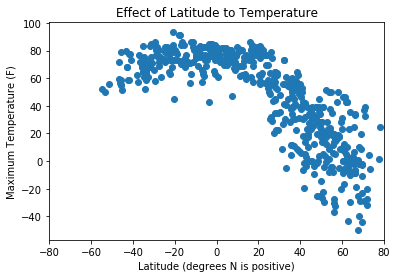

In [23]:
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'])
plt.title("Effect of Latitude to Temperature")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Maximum Temperature (F)")
plt.xlim(-80,80)
plt.savefig('output_data/temp.png')

#### Latitude vs. Cloudiness Plot

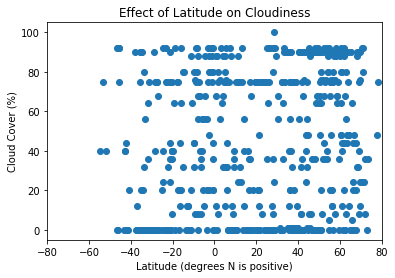

In [24]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title("Effect of Latitude on Cloudiness")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Cloud Cover (%)")
plt.xlim(-80,80)
plt.savefig('output_data/cloud.png')

#### Latitude vs. Wind Speed Plot

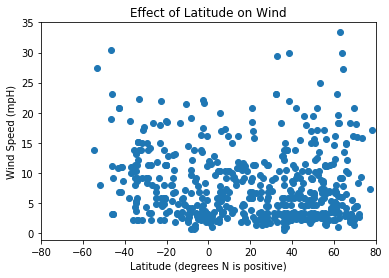

In [25]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.title("Effect of Latitude on Wind")
plt.xlabel("Latitude (degrees N is positive)")
plt.ylabel("Wind Speed (mpH)")
plt.xlim(-80,80)
plt.savefig('output_data/wind.png')

## Analysis

* This analysis was done during January 2019. As such, it is windter in the northern hemisphere and summer in the southern hemisphere. The plot of the high temperatures reflect this fact. It is much colder as you approach the north pole as opposed to the south pole. 
* The plots of wind speed and cloudiness do not reflect such obvious patterns. If there was a measurement of elevation above sea level or distance from the ocean, we might see a more intense correlation.
* I believe this is a good representation of random cities as reflected by a pure number generator. However, the sample lacks cities below 60 degress south of the equater. This reflects that there is not much of a human settlement in Antartica. However, the Artic circle is far less remote and has cities.